In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve


# get data :

In [3]:
ad_data = pd.read_csv('C:\\Users\DELL\\OneDrive\\Bureau\\selfeducations\\projects\\Logistic Regression advertising\\advertising.csv')

In [5]:
# show the head of data 5 first rows 
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
# show the shape of data :
ad_data.shape

(1000, 10)

In [31]:
#show only columns names : 
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
# show data columns and data type :
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
# descriptive statistic : 
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Data Analysis : 

## Univariate Analysis:


### Distribution of age : 

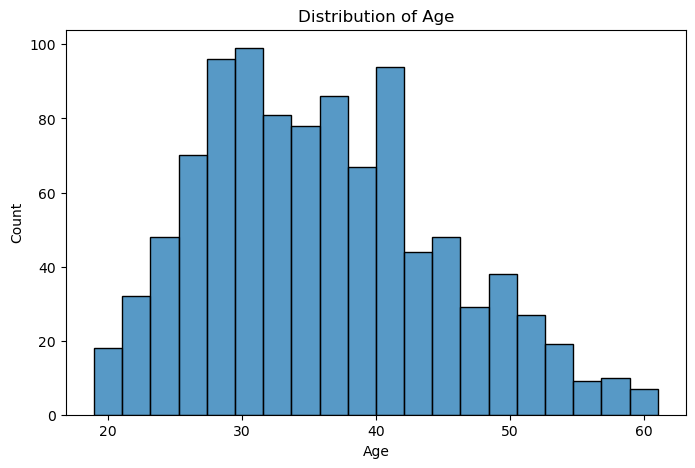

In [15]:
plt.figure(figsize=(8,5)) # set a fig size 8 by 5
sns.histplot(ad_data['Age'],bins= 20) # creat a histograme of 20 bins of Age 
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Distribution of Gender : 

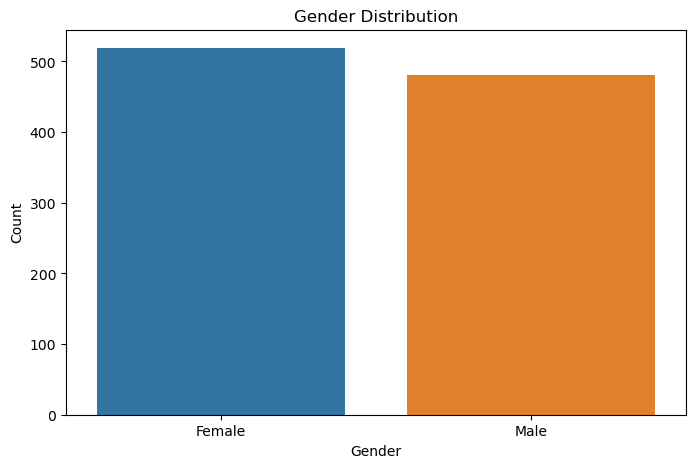

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='Male',data = ad_data)  # Create a count plot with 'Male' as the x-axis and 'ad_data' as the data source
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Female', 'Male'])  # Set custom tick labels for the x-axis
plt.show()

### Correlation : 

C:\Users\DELL\AppData\Local\Temp\ipykernel_7420\1951576788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ad_data.corr()


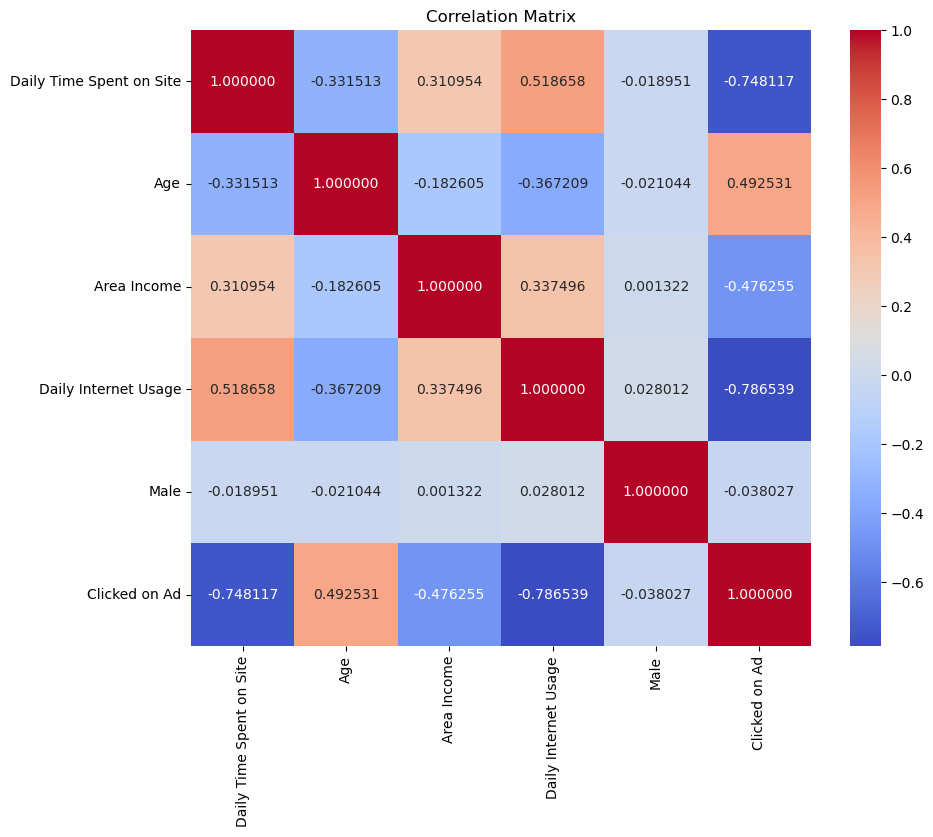

In [27]:
correlation_matrix = ad_data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True, cmap = 'coolwarm',fmt = '2f'  )
plt.title('Correlation Matrix')
plt.show()

### Vizualization of relations betewwen colmuns: 


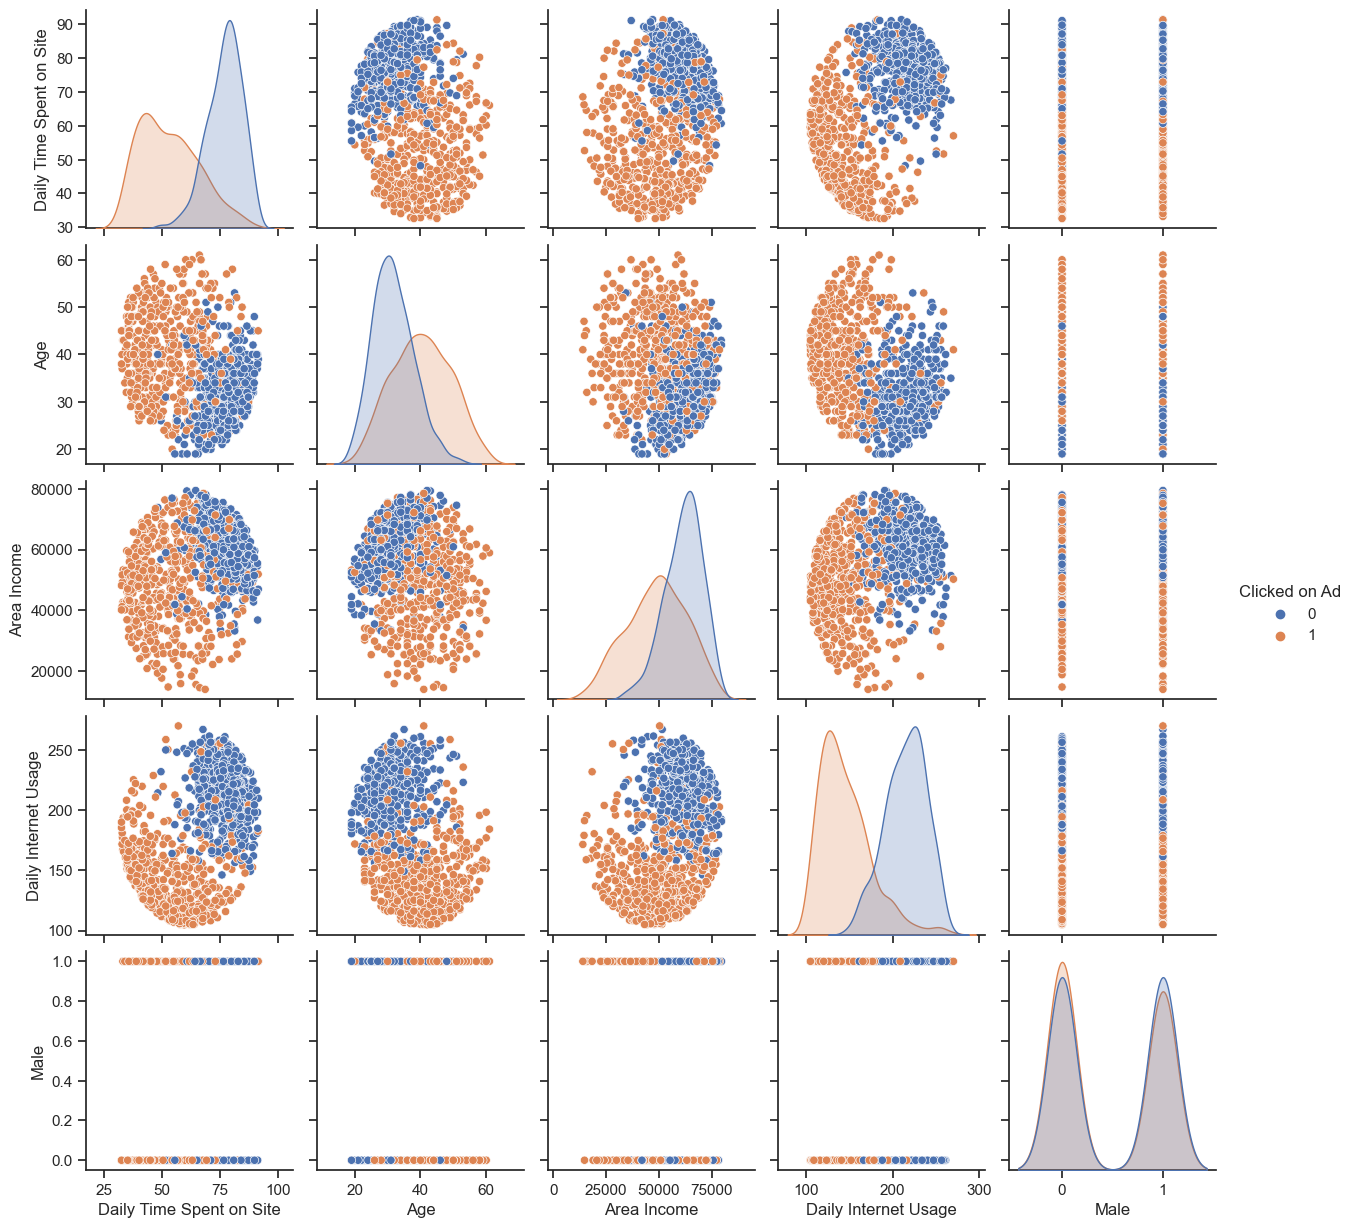

In [37]:

sns.pairplot(ad_data,hue='Clicked on Ad')


# Logistique Regression : 

###  Data Preprocessing

In [39]:
# create the input varaibles for data 
X = ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
# create the target variable click on add as output : 
Y = ad_data['Clicked on Ad']


In [40]:
# Split the data into train data 80% and test data 20% : 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)


### Model Training

In [44]:
# intialize the Logistic Regression Model : 
logReg_model = LogisticRegression()
# train the model : 
logReg_model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation : 

In [45]:
# make predection on the test set : 
Y_pred = logReg_model.predict(X_test)

In [53]:
results_df = pd.DataFrame({'Y_pred': Y_pred, 'Y_test': Y_test})
results_df.head()

,Y_pred,Y_test
890,0,0
694,0,0
798,1,0
147,1,1
858,1,1


In [57]:
# calculate the acuarcy of the model : 
accuracy = accuracy_score(Y_test,Y_pred)
print("The Accuracy  = ",accuracy)
print("The Accuracy  = ",accuracy*100,'%')


The Accuracy  =  0.91
The Accuracy  =  91.0 %


In [69]:
# generate a classification report : 
Classification_rep = classification_report(Y_test,Y_pred,target_names=['Classe 0 ','Classe 1'],output_dict=True)
#convert the classification reprt dictionary to DataFrame: 
report_df = pd.DataFrame(Classification_rep).transpose()
print("Classification report : \n\n")
report_df.head()

Classification report : 




,precision,recall,f1-score,support
Classe 0,0.934579,0.900901,0.917431,111.00
Classe 1,0.881720,0.921348,0.901099,89.00
accuracy,0.910000,0.910000,0.910000,0.91
macro avg,0.908150,0.911125,0.909265,200.00
weighted avg,0.911057,0.910000,0.910163,200.00


In [71]:
# Generate a confusion matrix : 
conf_matrix = confusion_matrix(Y_test,Y_pred)
# transforme it to DataFrame : 
conf_matrix_df = pd.DataFrame(conf_matrix).transpose()
conf_matrix_df

,0,1
0,100,7
1,11,82


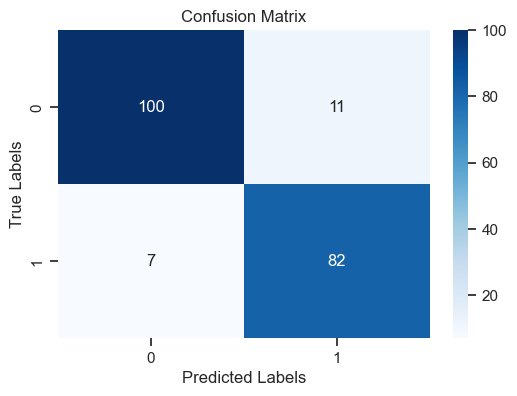

In [77]:
# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [74]:
#calculate the roc AUC score : 
roc_AUC_score = roc_auc_score(Y_test,logReg_model.predict_proba(X_test)[:,-1])
print('ROC AUC Score : ', roc_AUC_score)

ROC AUC Score :  0.9580929243850592


###### ROC AUC score of 0.958 indicates a highly effective classifier with a strong ability to discriminate between the two classes in the binary classification problem. It's considered a very good result and suggests that the model is making accurate predictions for the target variable.



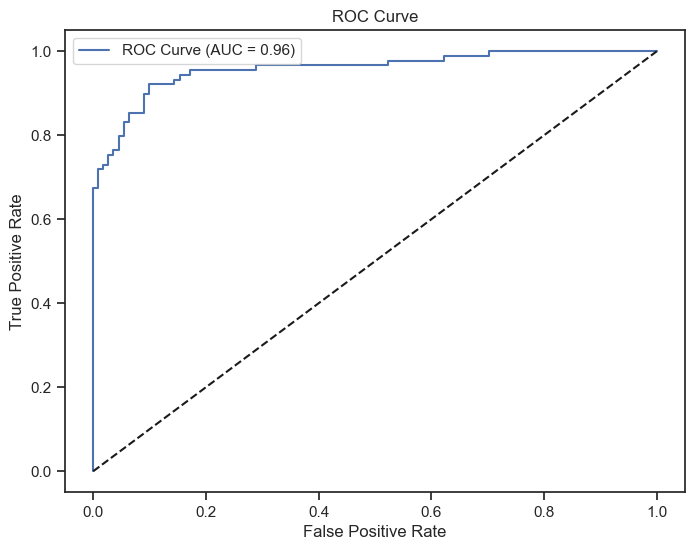

In [94]:
# Additional Visualization (ROC Curve) : 
fpr, tpr, thresholds = roc_curve(Y_test, logReg_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_AUC_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
